<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_sac_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fix Potential Library Conflicts
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [ ]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,783 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,994 kB]
Get:13 http://archive.ubuntu.com/ubu

In [ ]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [ ]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [ ]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 47.8 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [ ]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [ ]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

# Immediately follow it with:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


In [ ]:
import os
os.path.exists("multi_stock_feature_engineered_dataset.csv")

# Imports (if not already imported earlier)
import os
import gc
import time
import torch
import pandas as pd
import numpy as np
from stable_baselines3 import SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement
import psutil

# Custom Trading Environment (needs to be defined or imported)
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box

class ContinuousTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

    def step(self, action):
        try:
            # Convert continuous action to discrete
            if action < -0.3:
                discrete_action = 0  # SELL
            elif action > 0.3:
                discrete_action = 1  # BUY
            else:
                discrete_action = 2  # HOLD

            step_result = super().step(discrete_action)

            if len(step_result) == 5:
                obs, reward, terminated, truncated, info = step_result
            else:
                obs, reward, done, info = step_result
                terminated, truncated = done, False

            price_diff = self.df.loc[self._current_tick, 'Close'] - self.df.loc[self._current_tick - 1, 'Close']
            reward += price_diff * discrete_action
            reward = np.clip(reward, -1.0, 1.0)

            return obs, reward, terminated, truncated, info
        except Exception as e:
            print(f"Error during step: {e}")
            return self.reset(), 0, True, True, {}

# =============================
# ✅ Load and preprocess stock data
# =============================

# Assume this comes from your prior feature engineering pipeline
# Example: loading saved feature-engineered dataset
if not os.path.exists("multi_stock_feature_engineered_dataset.csv"):
    raise FileNotFoundError("Required feature-engineered dataset not found!")

# Load dataset
df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")

# Fix potential datetime parsing if needed
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])

# =============================
# ✅ Define Ticker List and CONFIG
# =============================
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': ticker_list,
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

print("✅ Environment and data loaded successfully. Ready for SAC training!")



In [ ]:
import os
import gc
import time
import torch
import pandas as pd
import numpy as np
from stable_baselines3 import SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement
import psutil

# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

test_mode = False
test_symbol = 'AAPL'
test_timesteps = 2000
enable_plotting = False
limit_symbols = 53
tickers_per_batch = 5
reduced_mode = True
resume_from_symbol = None

# Filter high-volume stocks
filtered_symbols = df.groupby('Symbol').filter(lambda x: x['Volume'].mean() > 1_000_000)['Symbol'].unique()
symbols_to_run = [test_symbol] if test_mode else filtered_symbols[:limit_symbols]

if resume_from_symbol in symbols_to_run:
    resume_index = symbols_to_run.index(resume_from_symbol)
    symbols_to_run = symbols_to_run[resume_index:]

print("TEST MODE:", test_mode)
print(f"Symbols to run: {symbols_to_run}")

policy_kwargs = dict(net_arch=[32, 32])
batch_size = 256 if reduced_mode else 512
buffer_size = 50_000 if reduced_mode else 100_000

def print_memory_usage():
    print(f"Memory used: {psutil.virtual_memory().used / 1e9:.2f} GB")

# Train SAC models
for symbol in symbols_to_run:
    df_symbol = df[df['Symbol'] == symbol].dropna(subset=['Close']).reset_index(drop=True)
    frame_bound = (50, len(df_symbol))

    print(f"\nTraining SAC model for: {symbol}")
    try:
        env = DummyVecEnv([lambda: ContinuousTradingEnv(df=df_symbol, frame_bound=frame_bound, window_size=10)])
        eval_env = DummyVecEnv([lambda: Monitor(ContinuousTradingEnv(df=df_symbol, frame_bound=frame_bound, window_size=10))])
        n_actions = env.action_space.shape[-1]
        action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))
        timesteps = min(25000, len(df_symbol) * 10)

        eval_callback = EvalCallback(
            eval_env,
            callback_after_eval=StopTrainingOnNoModelImprovement(max_no_improvement_evals=4, min_evals=7, verbose=1),
            eval_freq=1000,
            best_model_save_path=f"./tmp_best_sac_{symbol.lower()}",
            verbose=0
        )

        model = SAC(
            "MlpPolicy",
            env,
            verbose=0,
            batch_size=batch_size,
            learning_rate=0.0003,
            buffer_size=buffer_size,
            tau=0.005,
            gamma=0.995,
            train_freq=1,
            gradient_steps=1,
            action_noise=action_noise,
            policy_kwargs=policy_kwargs,
            device=device
        )
        model.learn(total_timesteps=test_timesteps if test_mode else timesteps, callback=eval_callback)
        model.save(f"sac_{symbol.lower()}")
        print(f"Model saved for {symbol}")
    except Exception as e:
        print(f"Training failed for {symbol}: {e}")
    finally:
        del model, env, eval_env
        gc.collect()
        torch.cuda.empty_cache()

# Inference and Evaluation
results = []
performance_summary = []
missing_models = []
start_time = time.time()

for i, symbol in enumerate(symbols_to_run):
    df_symbol = df[df['Symbol'] == symbol].dropna(subset=['Close']).reset_index(drop=True)
    frame_bound = (50, len(df_symbol))
    model_path = f"sac_{symbol.lower()}.zip"

    print(f"\nRunning SAC strategy for: {symbol}")

    if not os.path.exists(model_path):
        print(f"Missing model for {symbol}")
        missing_models.append(symbol)
        continue

    try:
        env = DummyVecEnv([lambda: ContinuousTradingEnv(df=df_symbol, frame_bound=frame_bound, window_size=10)])
        model = SAC.load(model_path.replace(".zip", ""), device=device)
        obs = env.reset()

        trade_log, buy_price, total_return = [], None, 0
        buy_thresh = 0.4 if symbol in ['KO', 'PFE', 'AMD'] else 0.3
        sell_thresh = -0.4 if symbol in ['KO', 'PFE', 'AMD'] else -0.3
        min_profit_threshold = 0.5

        for j in range(len(df_symbol)):
            action, _ = model.predict(obs)
            step_result = env.step(action)

            if len(step_result) == 5:
                obs, _, terminated, truncated, _ = step_result
            else:
                obs, _, done, _ = step_result
                terminated, truncated = done, False

            action_value = float(action.flatten()[0])
            current_price = df_symbol['Close'].iloc[j]

            if action_value > buy_thresh and buy_price is None:
                trade_log.append("BUY")
                buy_price = current_price
            elif action_value < sell_thresh and buy_price is not None:
                profit = current_price - buy_price
                if profit > min_profit_threshold:
                    total_return += profit
                    trade_log.append("SELL")
                    buy_price = None
                else:
                    trade_log.append("HOLD")
            else:
                trade_log.append("HOLD")

            if terminated or truncated:
                break

        # Padding/Harmonizing signal length
        trade_log = trade_log[:len(df_symbol)] + ["HOLD"] * (len(df_symbol) - len(trade_log))

        df_symbol["SAC_Trade_Signal"] = trade_log
        buy_count = trade_log.count("BUY")
        sell_count = trade_log.count("SELL")

        returns = df_symbol['Close'].pct_change().dropna()
        std_dev = returns.std()
        avg_return = total_return / len(df_symbol)
        risk_adjusted = avg_return / std_dev if std_dev else 0

        if total_return < 0 or risk_adjusted < 0.05 or buy_count < 10:
            print(f"Skipping {symbol}: poor performance")
            df_symbol.to_csv(f"sac_skipped_signals_{symbol.lower()}.csv", index=False)
            continue

        print(f"{symbol}: {buy_count} BUYs, {sell_count} SELLs, PnL=${total_return:.2f}")
        df_symbol.to_csv(f"sac_results_{symbol}.csv", index=False)

        performance_summary.append({
            "Symbol": symbol,
            "Buy_Count": buy_count,
            "Sell_Count": sell_count,
            "Estimated_PnL": round(total_return, 2),
            "Risk_Adjusted_Score": round(risk_adjusted, 4)
        })

        results.append(symbol)

        # Intermediate save
        pd.DataFrame(performance_summary).to_csv("sac_performance_summary_progress.csv", index=False)

        # Memory tracking
        if (i + 1) % 5 == 0:
            print_memory_usage()

        elapsed = (time.time() - start_time) / 60
        remaining = (len(symbols_to_run) - (i + 1)) * (elapsed / (i + 1))
        print(f"Elapsed: {elapsed:.2f} min | Est. Remaining: {remaining:.2f} min")

    except Exception as e:
        print(f"Inference failed for {symbol}: {e}")
    finally:
        del model, env, df_symbol
        gc.collect()
        torch.cuda.empty_cache()

# Save final results
if performance_summary:
    pd.DataFrame(performance_summary).to_csv("sac_performance_summary.csv", index=False)
    print("Saved final performance summary.")

if missing_models:
    print(f"{len(missing_models)} model(s) missing: {', '.join(missing_models)}")


Using device: cpu
TEST MODE: False
Symbols to run: ['AAPL' 'TSLA' 'MSFT' 'GOOGL' 'AMZN' 'NVDA' 'META' 'JPM' 'XOM' 'KO' 'BAC'
 'AVGO' 'PFE' 'CSCO' 'WMT' 'NKE' 'INTC' 'NEE' 'AMD' 'BMY' 'ORCL']

Training SAC model for: AAPL
Stopping training because there was no new best model in the last 5 evaluations
Model saved for AAPL

Training SAC model for: TSLA
Stopping training because there was no new best model in the last 5 evaluations
Model saved for TSLA

Training SAC model for: MSFT
Stopping training because there was no new best model in the last 5 evaluations
Model saved for MSFT

Training SAC model for: GOOGL
Stopping training because there was no new best model in the last 5 evaluations
Model saved for GOOGL

Training SAC model for: AMZN
Stopping training because there was no new best model in the last 5 evaluations
Model saved for AMZN

Training SAC model for: NVDA
Stopping training because there was no new best model in the last 5 evaluations
Model saved for NVDA

Training SAC model f

In [ ]:
import gc
gc.collect

🔁 Saved feature-engineered dataset: multi_stock_feature_engineered_dataset.csv
📈 Loaded SAC performance summary:
  Symbol  Buy_Count  Sell_Count  Estimated_PnL  Risk_Adjusted_Score
0   AAPL         62          61         117.98               3.7228
1   TSLA         21          20         273.77               3.9327
2   MSFT         79          78         206.84               6.6964
3  GOOGL         59          58          80.68               2.1415
4   AMZN         60          59         125.70               2.8887
📊 Loaded SAC trade results for TSLA
                       Datetime       Close SAC_Trade_Signal
4929  2025-04-03 16:30:00+00:00  268.279999             HOLD
4930  2025-04-03 17:30:00+00:00  267.087799             HOLD
4931  2025-04-03 18:30:00+00:00  265.899994             HOLD
4932  2025-04-03 19:30:00+00:00  267.140015             HOLD
4933  2025-04-04 13:30:00+00:00  242.413696             HOLD


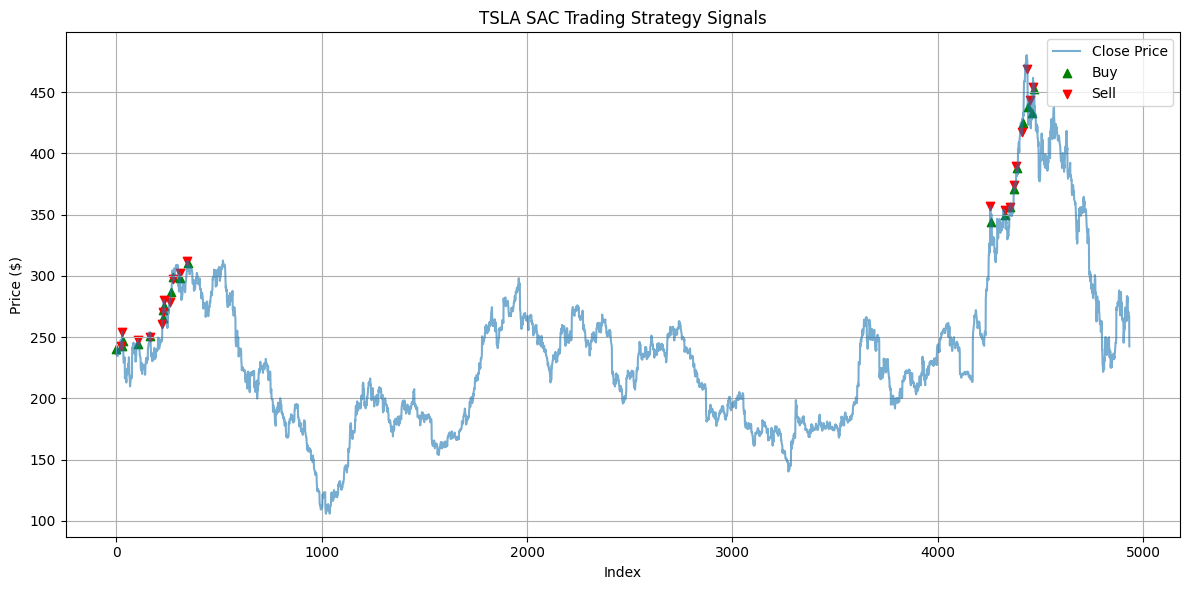

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

# ✅ 1. Save feature-engineered dataset for future use (if not done already)
df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
print("🔁 Saved feature-engineered dataset: multi_stock_feature_engineered_dataset.csv")

# ✅ 2. Load SAC performance summary
performance_summary = pd.read_csv("sac_performance_summary.csv")
print("📈 Loaded SAC performance summary:")
print(performance_summary.head())

# ✅ 3. Load one stock's SAC trade results for review or plotting
symbol = "TSLA"  # Change to any symbol in your list
sac_result_file = f"sac_results_{symbol}.csv"

if os.path.exists(sac_result_file):
    df_symbol = pd.read_csv(sac_result_file)
    print(f"📊 Loaded SAC trade results for {symbol}")
    print(df_symbol[["Datetime", "Close", "SAC_Trade_Signal"]].tail())

    # ✅ 4. Optional: Plot SAC signals
    buy_signals = df_symbol[df_symbol["SAC_Trade_Signal"] == "BUY"]
    sell_signals = df_symbol[df_symbol["SAC_Trade_Signal"] == "SELL"]

    plt.figure(figsize=(12, 6))
    plt.plot(df_symbol["Close"].values, label="Close Price", alpha=0.6)
    plt.scatter(buy_signals.index, buy_signals["Close"], marker="^", color="green", label="Buy")
    plt.scatter(sell_signals.index, sell_signals["Close"], marker="v", color="red", label="Sell")
    plt.title(f"{symbol} SAC Trading Strategy Signals")
    plt.xlabel("Index")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ SAC results for {symbol} not found.")


In [ ]:
import os, gc, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load performance summary
summary_path = "sac_performance_summary.csv"
if not os.path.exists(summary_path):
    raise FileNotFoundError("Missing 'sac_performance_summary.csv' – run inference first.")

performance_df = pd.read_csv(summary_path)
global_results = []

initial_balance = 100000

def generate_filename(stock, model="sac", version="v2", ext="json", use_date=True):
    date_str = datetime.now().strftime("%Y-%m-%d") if use_date else ""
    return f"{stock}_{model}_{version}{'_' + date_str if use_date else ''}.{ext}"

def save_results(stock, final_value, cumulative_return, sharpe, drawdown, trade_log, version="v2"):
    # Save JSON summary
    json_path = generate_filename(stock, "sac", version, "json")
    with open(json_path, "w") as f:
        json.dump({
            "model_name": "SAC",
            "final_value": final_value,
            "cumulative_return": cumulative_return,
            "sharpe_ratio": sharpe,
            "max_drawdown": drawdown,
            "trade_log": trade_log[:10]  # Preview
        }, f, indent=2)

    # Save trade log
    csv_path = generate_filename(stock, "sac", version, "csv")
    pd.DataFrame(trade_log, columns=["Trade Signal"]).to_csv(csv_path, index=False)
    print(f"✅ Saved {stock} → JSON: {json_path}, CSV: {csv_path}")

def run_evaluation(stock):
    result_path = f"sac_results_{stock}.csv"
    if not os.path.exists(result_path):
        print(f"❌ Missing result CSV for {stock}")
        return

    df = pd.read_csv(result_path)
    if "SAC_Trade_Signal" not in df.columns:
        print(f"❌ No trade signal column in {result_path}")
        return

    trade_log = df["SAC_Trade_Signal"].tolist()
    df = df.reset_index(drop=True)
    df = df.iloc[50:].reset_index(drop=True)
    trade_log = trade_log[:len(df)]  # match length

    # Backtest strategy
    balance, position = initial_balance, 0
    portfolio = []

    for i, trade in enumerate(trade_log):
        if i + 50 >= len(df):
            break
        price = df['Close'].iloc[i + 50]
        if trade == "BUY" and position == 0:
            position = balance / price
            balance = 0
        elif trade == "SELL" and position > 0:
            balance = position * price
            position = 0
        portfolio.append(balance if balance > 0 else position * price)

    if not portfolio:
        print(f"⚠ No trades or portfolio entries for {stock}")
        return

    # Metrics
    final_value = portfolio[-1]
    hold_value = (initial_balance / df['Close'].iloc[0]) * df['Close'].iloc[-1]
    returns = pd.Series(portfolio).pct_change().fillna(0)
    sharpe = (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() != 0 else 0
    drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100
    cumulative = ((final_value / initial_balance) - 1) * 100
    winner = "SAC" if final_value > hold_value else "Buy & Hold"

    # Plot with alignment fix
    try:
        aligned_dates = df['Datetime'].iloc[50:50 + len(portfolio)].values if "Datetime" in df.columns else df.index[:len(portfolio)]
        aligned_prices = df['Close'].iloc[50:50 + len(portfolio)].values

        plt.figure(figsize=(12, 6))
        plt.plot(aligned_dates, aligned_prices, label='Close Price', alpha=0.4)
        plt.plot(aligned_dates, portfolio, label='SAC Portfolio Value')
        plt.title(f"{stock} SAC Trading Strategy")
        plt.xlabel("Date")
        plt.ylabel("Portfolio Value ($)")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"{stock}_sac_portfolio_plot.png")
        plt.close()
        print(f"📊 Plot saved: {stock}_sac_portfolio_plot.png")
    except Exception as e:
        print(f"⚠ Plot failed for {stock}: {e}")

    # Save all
    save_results(stock, final_value, cumulative, sharpe, drawdown, trade_log)
    global_results.append({
        "Symbol": stock,
        "SAC_Portfolio_Value": round(final_value, 2),
        "Buy_Hold_Value": round(hold_value, 2),
        "Cumulative_Return_%": round(cumulative, 2),
        "Sharpe": round(sharpe, 2),
        "Max_Drawdown_%": round(drawdown, 2),
        "Winner": winner
    })

# Loop through all symbols
for stock in performance_df["Symbol"]:
    print(f"\n📈 Evaluating {stock}...")
    run_evaluation(stock)
    gc.collect()

# Save final summary
summary_df = pd.DataFrame(global_results)
summary_df.to_csv("sac_strategy_evaluation_summary.csv", index=False)
print("\n✅ All evaluations completed and saved to: sac_strategy_evaluation_summary.csv")


📈 Evaluating AAPL...
📊 Plot saved: AAPL_sac_portfolio_plot.png
✅ Saved AAPL → JSON: AAPL_sac_v2_2025-04-07.json, CSV: AAPL_sac_v2_2025-04-07.csv

📈 Evaluating TSLA...
📊 Plot saved: TSLA_sac_portfolio_plot.png
✅ Saved TSLA → JSON: TSLA_sac_v2_2025-04-07.json, CSV: TSLA_sac_v2_2025-04-07.csv

📈 Evaluating MSFT...
📊 Plot saved: MSFT_sac_portfolio_plot.png
✅ Saved MSFT → JSON: MSFT_sac_v2_2025-04-07.json, CSV: MSFT_sac_v2_2025-04-07.csv

📈 Evaluating GOOGL...
📊 Plot saved: GOOGL_sac_portfolio_plot.png
✅ Saved GOOGL → JSON: GOOGL_sac_v2_2025-04-07.json, CSV: GOOGL_sac_v2_2025-04-07.csv

📈 Evaluating AMZN...
📊 Plot saved: AMZN_sac_portfolio_plot.png
✅ Saved AMZN → JSON: AMZN_sac_v2_2025-04-07.json, CSV: AMZN_sac_v2_2025-04-07.csv

📈 Evaluating NVDA...
📊 Plot saved: NVDA_sac_portfolio_plot.png
✅ Saved NVDA → JSON: NVDA_sac_v2_2025-04-07.json, CSV: NVDA_sac_v2_2025-04-07.csv

📈 Evaluating META...
📊 Plot saved: META_sac_portfolio_plot.png
✅ Saved META → JSON: META_sac_v2_2025-04-07.json, CSV: 


Top 5 SAC Strategy Performers:
   Symbol  SAC_Portfolio_Value  Cumulative_Return_%  Sharpe  Max_Drawdown_%
5    NVDA            617383.02               517.38    0.58           42.02
6    META            299828.11               199.83    0.44           51.52
11   AVGO            286545.86               186.55    0.43           43.04
7     JPM            229074.48               129.07    0.55           17.79
13    WMT            217362.13               117.36    0.59           17.45


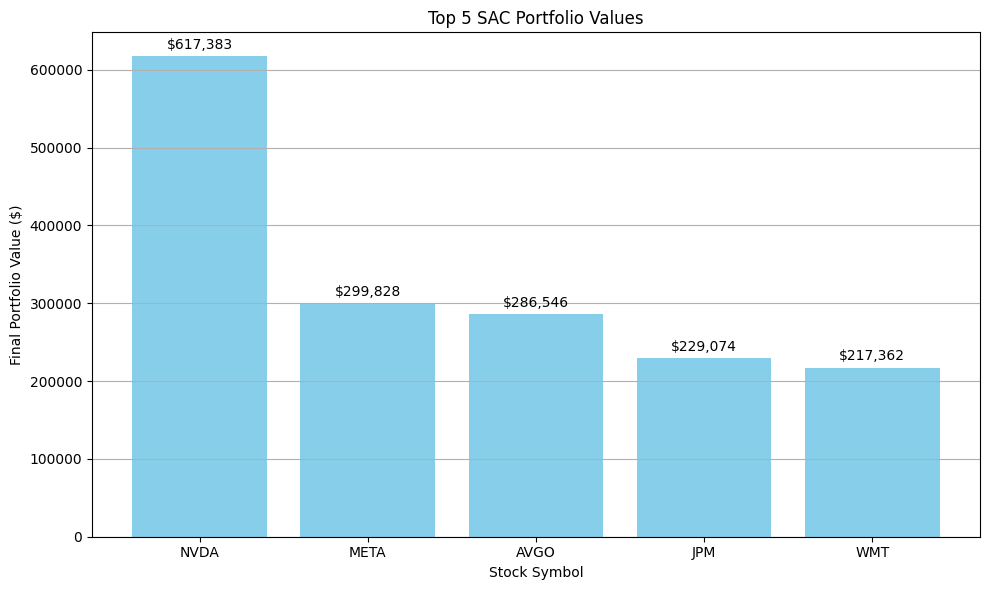

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load evaluation results
summary_df = pd.read_csv("sac_strategy_evaluation_summary.csv")

# Get top 5 performers
top_performers = summary_df.sort_values(by="SAC_Portfolio_Value", ascending=False).head(5)
print("\nTop 5 SAC Strategy Performers:")
print(top_performers[["Symbol", "SAC_Portfolio_Value", "Cumulative_Return_%", "Sharpe", "Max_Drawdown_%"]])
# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_performers["Symbol"], top_performers["SAC_Portfolio_Value"], color='skyblue')
plt.title("Top 5 SAC Portfolio Values")
plt.ylabel("Final Portfolio Value ($)")
plt.xlabel("Stock Symbol")
plt.grid(axis='y')

# Annotate
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"${height:,.0f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()  # This will display in Colab!


In [ ]:
#Free GPU Memory Before Training
gc.collect()
torch.cuda.empty_cache()